In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


# DENSE

In [2]:
# test_DENSE_data = np.load('/p/mmcardiac/Jerry/code/CINE-DENSE-Translation/data/DENSE/2024-04-16-test-data.npy', allow_pickle=True).tolist()
test_DENSE_data = np.load('/scratch/jx8fh/2024-04-16-test-data.npy', allow_pickle=True).tolist()
# test_DENSE_data = np.load('/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/lamod_test.npy', allow_pickle=True).tolist()
print(f"len(test_DENSE_data) = {len(test_DENSE_data)}")
check_dict(test_DENSE_data[0])

len(test_DENSE_data) = 102
patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)            

In [3]:
# trial_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-085-UVA_05192021-76.npy'
# trial_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-085-UVA_05192021-76.npy'
trial_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-001-033-86.npy'
# trial_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-001-033-86.npy'
trial_data = np.load(trial_npy_fname, allow_pickle=True).tolist()

In [4]:
len(trial_data)

5

In [5]:
check_dict(trial_data[0])

disp_GT                                                      (2, 48, 48, 51)     
disp_pred                                                    (2, 48, 48, 50)     
disp_mask                                                    (48, 48)            
strain_GT                                                    (48, 48, 51)        
strain_pred                                                  (48, 48, 50)        
origin_pred                                                  (2,)                
insertion_pred                                               (2,)                
CCs4_pred                                                    (4, 50)             
CCs6_pred                                                    (6, 50)             
CCs18_pred                                                   (18, 50)            
Seg4_pred                                                    dict_keys(['insertion_shifted', 'BasisNames', 'BasisID', 'SegmentID'])
Seg6_pred                                       

In [6]:
end_sys_DENSE_frame_indices = {
    '033': 24,#
    '122': 26,#
    '124': 22,#
    '125': 22,#
    '136': 26,#
    '146': 19,#
    '17': 20,
    'CRT104': 22,
    'CT01': 12,#
    'CT03': 12,
    'CT22': 12,#
    'CT40': 8,
    'Emory_04': 20,#
    'Emory_06': 20,#
    'Emory_07': 20,#
    'Lyon69_ene_al': 25,
    'Lyon_Cha_Jea': 20,
    'Lyon_Ene_Alex': 22,
    'Lyon_d04_scanA': 22,
    'OB015': 20,#
    'OB016': 17,#
    'OB017': 17,#
    'OB018': 17,#
    'OB019': 17,#
    'P117': 20,
    'StFrancis_DENSE10A': 22,
    'StFrancis_DENSE11A': 22,
    'UVA_04': 25,#
    'UVA_05': 20,#
    'UVA_05192021': 22,
    'UVA_07': 22,# 20->22
    'UVA_08_A_U1': 22,#
    'UVA_09_A_U1': 22,#
    'UVA_11_A_U1': 25,#
}

LMA_flag = {
    '033': True,
    '122': True,
    '124': True,
    '125': True,
    '136': True,
    '146': True,
    '17': False,
    'CRT104': True,
    'CT01': True,
    'CT03': False,
    'CT22': False,
    'CT40': True,
    'Emory_04': False,
    'Emory_06': False,
    'Emory_07': False,
    'Lyon69_ene_al': False,
    'Lyon_Cha_Jea': True,
    'Lyon_Ene_Alex': False,
    'Lyon_d04_scanA': False,
    'OB015': False,
    'OB016': False,
    'OB017': True,
    'OB018': False,
    'OB019': False,
    'P117': True,
    'StFrancis_DENSE10A': False,
    'StFrancis_DENSE11A': False,
    'UVA_04': False,
    'UVA_05': False,
    'UVA_05192021': False,
    'UVA_07': False,
    'UVA_08_A_U1': False,
    'UVA_09_A_U1': False,
    'UVA_11_A_U1': False,
}

In [7]:
# check_datum_idx = 85
check_datum_idx = 1
datum_patient_id = test_DENSE_data[check_datum_idx]['patient_id']
datum_ES_frame = end_sys_DENSE_frame_indices[datum_patient_id]
datum_ES_time = test_DENSE_data[check_datum_idx]['DENSE_frame_time_stamps'][datum_ES_frame]

In [8]:
datum_ES_frame

24

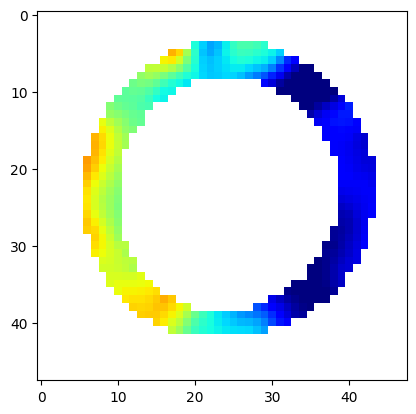

In [9]:
plt.imshow(trial_data[0]['strain_GT'][::-1,:,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)

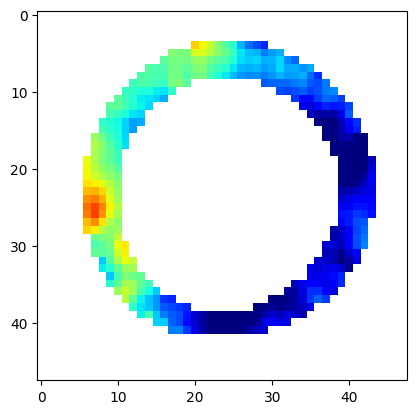

In [10]:
plt.imshow(trial_data[0]['strain_pred'][::-1,:,datum_ES_frame]*1.5, cmap='jet', vmin=-0.2, vmax=0.2)

In [11]:
datum_ES_frame

24

In [151]:
def epe_error(output, target):
    epe = np.sqrt(((output[:, 0, :, :, :] - target[:, 0, :, :, :])**2.0 
                 + (output[:, 1, :, :, :] - target[:, 1, :, :, :])**2.0))
    return epe

def epe_loss_numpy(output, target, mask):
    epe = np.sum(np.sqrt(((output[:, 0, :, :, :] - target[:, 0, :, :, :])**2.0 
                          + (output[:, 1, :, :, :] - target[:, 1, :, :, :])**2.0)) * mask[:, 0, :, :, :]) \
          / np.sum(mask[:, 0, :, :, :])
    return epe

In [152]:
# check the pixel-wise displacement field error
# Get data, where each pred/GT is an array with shape (2, H, W, NFrames)
pred_disps = [datum['disp_pred'] for datum in trial_data]
gt_disps = [datum['disp_GT'][...,:-1] for datum in trial_data]

# Compute the standard deviation of the pixel-wise displacement field error
# def disp_pixelwise_error(pred, gt):
#     return np.abs(pred - gt)

pred_pixelwise_errors = np.concatenate([epe_error(pred[None], gt[None])[None] for pred, gt in zip(pred_disps, gt_disps)], axis=0)
pred_pixelwise_error_std = np.std(pred_pixelwise_errors, axis=0)


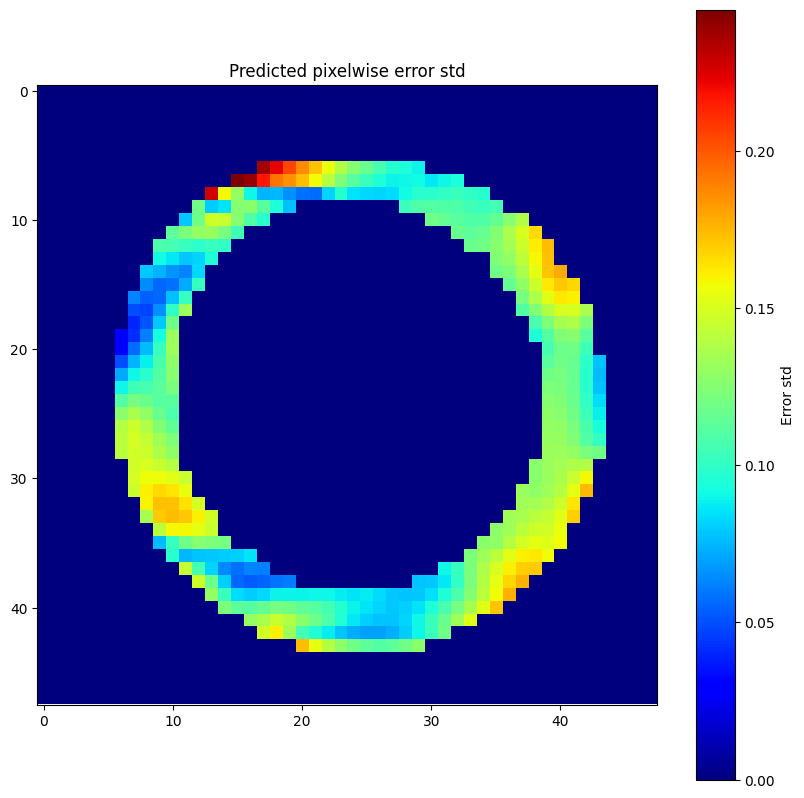

In [153]:
fig, axe = plt.subplots(1, 1, figsize=(10, 10))
axe.imshow(pred_pixelwise_error_std[0,...,10], cmap='jet')
axe.set_title('Predicted pixelwise error std')
# colorbar
cbar = fig.colorbar(axe.images[0])
cbar.set_label('Error std')

# DENSE strain curve

In [154]:
# Strain matrices
trial_DENSE_strainmat_pred = trial_data[0]['CCs6_pred']
trial_DENSE_strainmat_GT = trial_data[0]['CCs6_GT']

In [155]:
# segmental std
trial_DENSE_strainmat_pred_stds = np.std(
    np.concatenate([pred['CCs6_pred'][None] for pred in trial_data], axis=0),
    axis=0)

# trial_DENSE_gloabl_strain_curves_pred =     

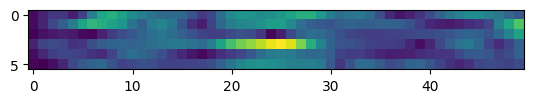

In [156]:
plt.imshow(trial_DENSE_strainmat_pred_stds)

In [157]:
# Global strain curves
trial_DENSE_global_strain_curves_pred = [np.mean(pred['CCs6_pred'], axis=0) for pred in trial_data]
trial_DENSE_global_strain_curves_GT = [np.mean(pred['CCs6_GT'], axis=0) for pred in trial_data]

trial_DENSE_global_strain_curves_pred_std = np.std(trial_DENSE_global_strain_curves_pred, axis=0)
trial_DENSE_global_strain_curves_GT_std = np.std(trial_DENSE_global_strain_curves_GT, axis=0)

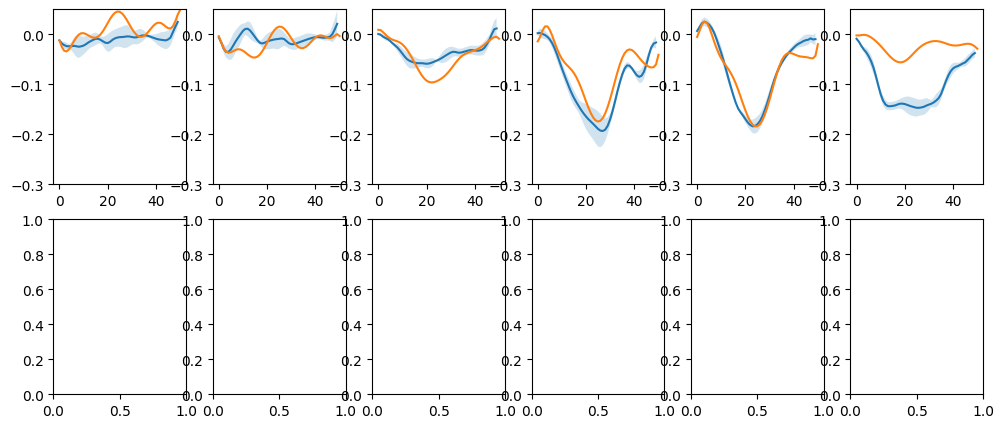

In [158]:
# Plot the segmental strain curves with std
n_sectors = 6
fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
for sector_idx in range(n_sectors):
    sector_strain_curves_pred_mean = np.mean([pred['CCs6_pred'][sector_idx]*1.5 for pred in trial_data], axis=0)
    sector_strain_curves_pred_std = np.std([pred['CCs6_pred'][sector_idx]*1.5 for pred in trial_data], axis=0)

    sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)
    # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

    axs[0, sector_idx].plot(sector_strain_curves_pred_mean, label='Predicted')
    axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
    axs[0, sector_idx].plot(sector_strain_curves_GT_mean, label='Ground Truth')
    # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

    # set the y-axis between -0.25 and 0.05
    axs[0, sector_idx].set_ylim([-0.3, 0.05])
    # axs[0, sector_idx].set_title(f'Sector {sector_idx+1}')
    # axs[0, sector_idx].legend()

# Cine

In [164]:
trial_cine_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-086-UVA04--36.npy'
# trial_cine_npy_fname = '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-SkipDiffusion-086-UVA04--36.npy'
trial_cine_data = np.load(trial_cine_npy_fname, allow_pickle=True).tolist()

In [169]:
trial_cine_data[0].keys()

dict_keys(['disp_GT', 'disp_pred', 'strain_GT', 'strain_pred', 'origin_pred', 'insertion_pred', 'CCs4_pred', 'CCs6_pred', 'CCs18_pred', 'Seg4_pred', 'Seg6_pred', 'Seg18_pred', 'CCs4Resampled_pred', 'CCs6Resampled_pred', 'CCs18Resampled_pred', 'origin_GT', 'insertion_GT', 'CCs4_GT', 'CCs6_GT', 'CCs18_GT', 'Seg4_GT', 'Seg6_GT', 'Seg18_GT', 'layerid_map_GT', 'CCs4_endo_GT', 'CCs6_endo_GT', 'CCs18_endo_GT', 'CCs4_mid_GT', 'CCs6_mid_GT', 'CCs18_mid_GT', 'CCs4_epi_GT', 'CCs6_epi_GT', 'CCs18_epi_GT', 'CCs4Resampled_GT', 'CCs6Resampled_GT', 'CCs18Resampled_GT'])

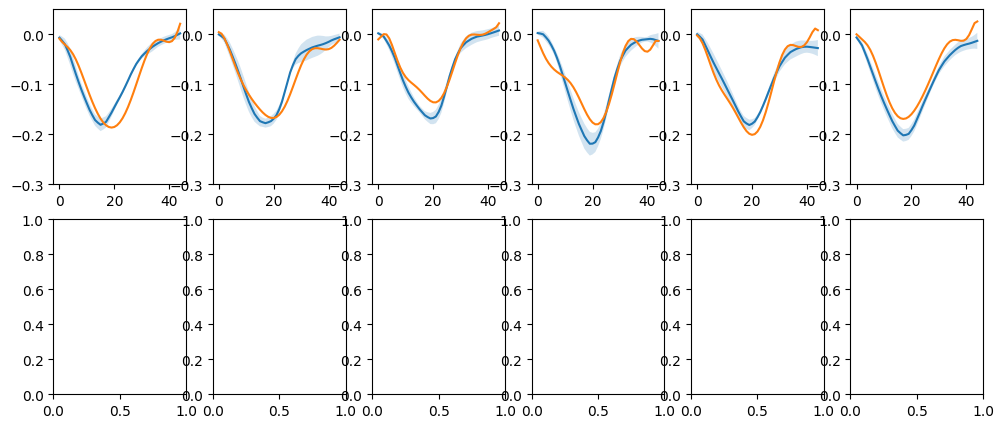

In [170]:
# Plot the segmental strain curves with std
n_sectors = 6
fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
for sector_idx in range(n_sectors):
    sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in trial_cine_data], axis=0)
    sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in trial_cine_data], axis=0)

    sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in trial_cine_data], axis=0)
    # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

    axs[0, sector_idx].plot(sector_strain_curves_pred_mean, label='Predicted')
    axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
    axs[0, sector_idx].plot(sector_strain_curves_GT_mean, label='Ground Truth')
    # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

    # set the y-axis between -0.25 and 0.05
    axs[0, sector_idx].set_ylim([-0.3, 0.05])
    # axs[0, sector_idx].set_title(f'Sector {sector_idx+1}')
    # axs[0, sector_idx].legend()